In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(1066, 800, 3)
(800, 1500, 3)


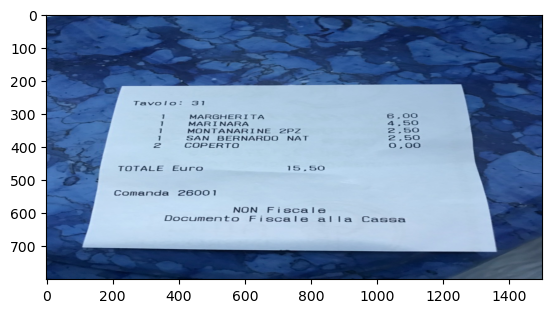

In [2]:
im_path="C:/Users/vnvar/Downloads/sampleImage.jpg"
#reading image now
img=cv2.imread(im_path)
print(img.shape)
#img resizing
img=cv2.resize(img,(1500,800))
#As open CV reads from BGR , we need to convert BGR->RGB
print(img.shape)
plt.imshow(img) #Display data as an image
plt.show()

->Blur or remove the unwanted parts 
->Edge Detection
->Contour Extraction
->Best Contour Selection
->Project to the Screen

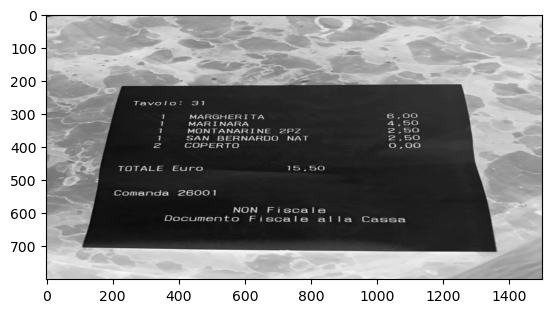

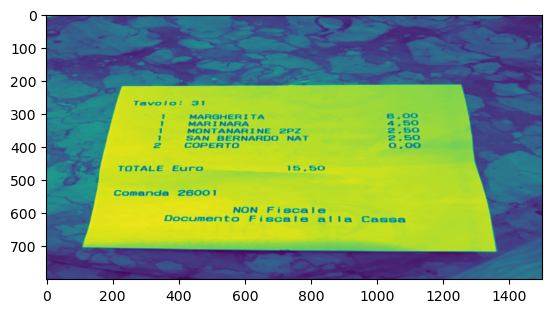

In [3]:
orig=img.copy()
gray=cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="binary")
plt.show()

blurred=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred)
plt.show()

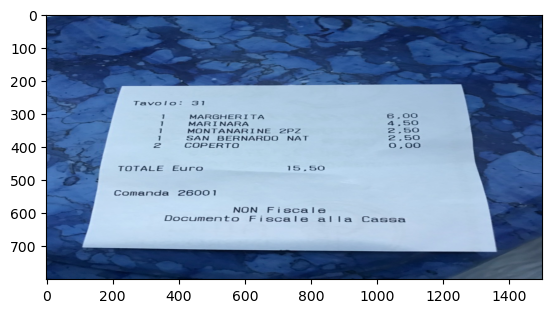

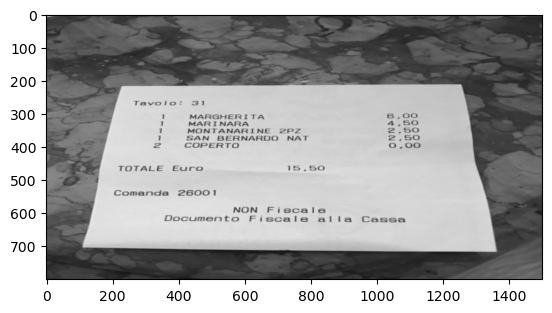

In [4]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

In [5]:
regen.shape

(800, 1500, 3)

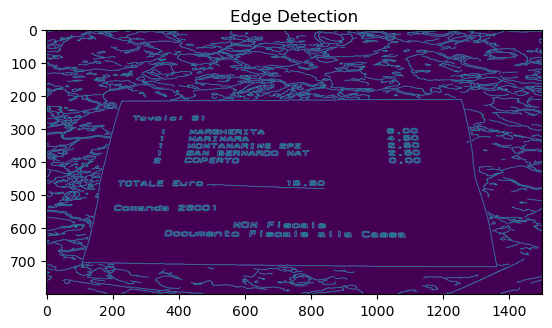

In [6]:
#Performing Edge Detection

edge=cv2.Canny(blurred,0,50)
orig_edge = edge.copy()
plt.title("Edge Detection")
plt.imshow(orig_edge)
plt.show()

In [7]:
#Contour Extraction

contours, _ = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours, reverse=True, key=cv2.contourArea)

1291


In [8]:
#Select the best Contour Region

for c in contours:
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.01*p,True)
    if len(approx) ==4:
        target = approx
        break
        
print(target.shape)        

(4, 1, 2)


In [9]:
##reordering of target Contour

def reorder(h):
    h=h.reshape((4,2))
    print(h)
    
    hnew=np.zeros((4,2),dtype=np.float32)
    
    add=h.sum(axis=1)
    hnew[3]=h[np.argmax(add)]
    hnew[1]=h[np.argmax(add)]
    
    diff=np.diff(h,axis=1)
    hnew[0]=h[np.argmax(diff)]
    hnew[2]=h[np.argmax(diff)]
    
    return hnew

    

In [10]:
reorder = reorder(target)
print("******************")

print(reorder)

[[ 78 299]
 [ 53 312]
 [  0 313]
 [ 54 312]]
******************
[[  0. 313.]
 [ 78. 299.]
 [  0. 313.]
 [ 78. 299.]]


In [11]:
# project to a fixed screen

input_representation = reorder

output_map= np.float32([[0,0],[800,0],[800,800],[0,800]])


In [12]:
M = cv2.getPerspectiveTransform(input_representation, output_map)

ans=cv2.warpPerspective(orig,M,(1200,1200))

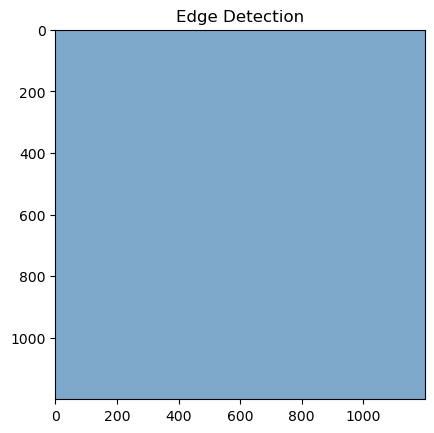

In [13]:
plt.title("Edge Detection")
plt.imshow(ans)
plt.show()

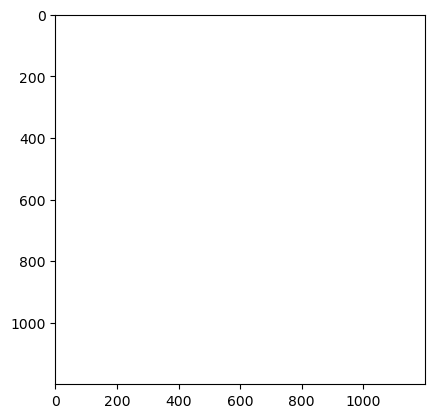

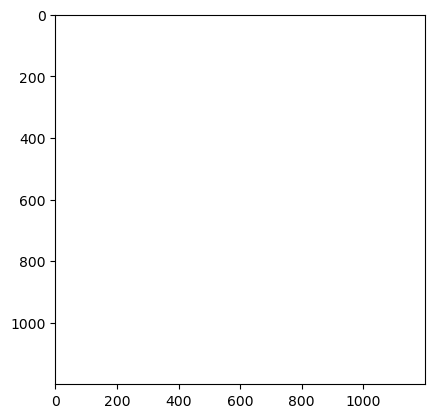

In [15]:
res=cv2.cvtColor(ans,cv2.COLOR_BGR2GRAY)

b_res = cv2.GaussianBlur(res,(5,5),0)

plt.imshow(res, cmap="binary")
plt.show()

plt.imshow(b_res, cmap="binary")
plt.show()